In [1]:
import json

file_path = "/kaggle/input/the-natural-questions-dataset/simplified-nq-train.jsonl"

with open(file_path, "r") as f:
    line = f.readline()
    example = json.loads(line)

print(example.keys())


dict_keys(['document_text', 'long_answer_candidates', 'question_text', 'annotations', 'document_url', 'example_id'])


In [2]:
import json

file_path = "/kaggle/input/the-natural-questions-dataset/simplified-nq-train.jsonl"

with open(file_path, "r") as f:
    f.readline()
    second_line = f.readline()
    example = json.loads(second_line)

print("Question:", example["question_text"])
print("\n --------------------------------")
print("Long answers candidates ",example["long_answer_candidates"])

print("\nDocument snippet:", example["document_text"][:300], "...")

print("\nAnnotations:", example["annotations"])


Question: how i.met your mother who is the mother

 --------------------------------
Long answers candidates  [{'start_token': 28, 'top_level': True, 'end_token': 212}, {'start_token': 29, 'top_level': False, 'end_token': 35}, {'start_token': 35, 'top_level': False, 'end_token': 45}, {'start_token': 45, 'top_level': False, 'end_token': 57}, {'start_token': 57, 'top_level': False, 'end_token': 79}, {'start_token': 79, 'top_level': False, 'end_token': 91}, {'start_token': 91, 'top_level': False, 'end_token': 103}, {'start_token': 103, 'top_level': False, 'end_token': 113}, {'start_token': 113, 'top_level': False, 'end_token': 118}, {'start_token': 118, 'top_level': False, 'end_token': 127}, {'start_token': 127, 'top_level': False, 'end_token': 135}, {'start_token': 135, 'top_level': False, 'end_token': 147}, {'start_token': 147, 'top_level': False, 'end_token': 168}, {'start_token': 168, 'top_level': False, 'end_token': 203}, {'start_token': 203, 'top_level': False, 'end_token': 211}, {'

In [3]:
count = 0
with open(file_path, "r") as f:
    for _ in f:
        count += 1
print("Total examples:", count)


Total examples: 307373


In [4]:
!pip install transformers datasets peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 42.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00:00:0100:01
  Attempting u

In [5]:
questions = []
long_answers = []
short_answers = []
long_answer_starts = [] 

with open(file_path, "r") as f:
    for line in f:
        example = json.loads(line)
        
        annotations = example.get('annotations', [])
        if not annotations:
            continue
        
        annotation = annotations[0] 
        short_ans = annotation.get('short_answers', [])
        long_ans = annotation.get('long_answer', None)
        
        if not short_ans or long_ans is None:
            continue
        
        doc_tokens = example['document_text'].split()
        long_start = long_ans['start_token']
        long_end = long_ans['end_token']
        long_text = " ".join(doc_tokens[long_start:long_end])
        
        short_start = short_ans[0]['start_token'] 
        short_end = short_ans[0]['end_token']
        
        questions.append(example['question_text'])
        long_answers.append(long_text)
        long_answer_starts.append(long_start) 
        short_answers.append({
            "start_token": short_start,
            "end_token": short_end
        })

print("Total usable examples:", len(questions))


Total usable examples: 106926


In [6]:
short_answer_count = 0
long_only_count = 0
no_answer_count = 0

with open(file_path, "r") as f:
    for line in f:
        example = json.loads(line)
        annotations = example.get('annotations', [])
        if not annotations:
            no_answer_count += 1
            continue
        annotation = annotations[0]
        short_ans = annotation.get('short_answers', [])
        long_ans = annotation.get('long_answer', None)

        if short_ans and long_ans is not None:
            short_answer_count += 1  
        elif long_ans is not None:
            long_only_count += 1 
        else:
            no_answer_count += 1

print("Examples usable for BERT (short + long):", short_answer_count)
print("Examples with only long answer:", long_only_count)
print("Examples with no answers:", no_answer_count)


Examples usable for BERT (short + long): 106926
Examples with only long answer: 200447
Examples with no answers: 0


In [26]:
import torch
from torch.utils.data import Dataset

class NQBertDataset(Dataset):
    def __init__(self, questions, long_answers, short_answers, long_answer_starts, tokenizer, max_length=512):
        self.questions = questions
        self.passages = long_answers
        self.short_answers = short_answers
        self.long_starts = long_answer_starts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        passage = self.passages[idx]
        short_ans = self.short_answers[idx]
        
        rel_start = short_ans['start_token'] - self.long_starts[idx]
        rel_end = short_ans['end_token'] - self.long_starts[idx]

        encoding = self.tokenizer(
            question,
            passage,
            truncation="only_second",
            padding="max_length",
            max_length=self.max_length,
            return_offsets_mapping=True,
            return_tensors="pt"
        )

        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)
        offsets = encoding['offset_mapping'].squeeze(0)
        sequence_ids = encoding.sequence_ids(0) 

        passage_words = passage.split()
        char_start = len(" ".join(passage_words[:rel_start])) + (1 if rel_start > 0 else 0)
        char_end = len(" ".join(passage_words[:rel_end]))

        start_token = 0
        end_token = 0

        for i, (s, e) in enumerate(offsets):
            if sequence_ids[i] == 1:
                if s <= char_start < e:
                    start_token = i
                if s < char_end <= e:
                    end_token = i
                    break

        item = {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "start_positions": torch.tensor(start_token, dtype=torch.long),
            "end_positions": torch.tensor(end_token, dtype=torch.long)
        }

        if "token_type_ids" in encoding:
            item["token_type_ids"] = encoding['token_type_ids'].squeeze(0)

        return item

In [27]:
from transformers import AutoTokenizer
from torch.utils.data import random_split

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

full_dataset = NQBertDataset(
    questions, 
    long_answers, 
    short_answers, 
    long_answer_starts, 
    tokenizer=tokenizer 
)

total_len = len(full_dataset)
train_len = int(0.9 * total_len)
val_len = int(0.05 * total_len)
test_len = total_len - train_len - val_len

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset,
    [train_len, val_len, test_len],
    generator=torch.Generator().manual_seed(42)
)

print(f"Train examples: {len(train_dataset)}")
print(f"Validation examples: {len(val_dataset)}")
print(f"Test examples: {len(test_dataset)}")

Train examples: 96233
Validation examples: 5346
Test examples: 5347


In [28]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)
test_loader = DataLoader(test_dataset, batch_size=8)

In [24]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
from peft import LoraConfig, get_peft_model

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.1,
    target_modules=["query", "value"],
    bias="none",
    task_type="QUESTION_ANS"
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

trainable params: 296,450 || all params: 109,189,636 || trainable%: 0.2715


/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [16]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")



Using 2 GPUs


In [55]:
num_train_epochs = 5
weight_decay = 0.01      
gradient_accumulation_steps = 1  
max_seq_length = 512     
learning_rate = 3e-4

In [56]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)


In [10]:
def compute_em_f1(pred_text, gold_texts):
    import collections
    
    def normalize(s):
        return " ".join(s.lower().split())

    pred_tokens = normalize(pred_text).split()
    em = max([int(normalize(g) == normalize(pred_text)) for g in gold_texts])
    
    f1_scores = []
    for g in gold_texts:
        g_tokens = normalize(g).split()
        common = collections.Counter(pred_tokens) & collections.Counter(g_tokens)
        num_same = sum(common.values())
        if num_same == 0:
            f1_scores.append(0)
        else:
            precision = num_same / len(pred_tokens)
            recall = num_same / len(g_tokens)
            f1_scores.append(2 * precision * recall / (precision + recall))
    f1 = max(f1_scores)
    return em, f1


In [11]:
import re
import string

def normalize(s):
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)
    def white_space_fix(text):
        return ' '.join(text.split())
    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)
    def lower(text):
        return text.lower()
    
    return white_space_fix(remove_articles(remove_punc(lower(s))))

In [59]:
import os

output_dir = "/kaggle/working/bertqa_lora"
os.makedirs(output_dir, exist_ok=True)

In [60]:
from tqdm import tqdm

for epoch in range(num_train_epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    total_loss = 0
    
    for step, batch in enumerate(loop):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            start_positions=start_positions,
            end_positions=end_positions,
            return_dict=True
        )
        
        loss = outputs.loss.mean()
        loss.backward()
        
        if (step + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
            
        total_loss += loss.item()
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    print(f"\nEpoch {epoch+1} Complete. Average Loss: {avg_loss:.4f}")

    pt_filename = f"bertqa_lora_reader_epoch{epoch+1}.pt"
    pt_save_path = os.path.join(output_dir, pt_filename)
    
    state_to_save = model.module.state_dict() if hasattr(model, 'module') else model.state_dict()
    
    torch.save(state_to_save, pt_save_path)
    print(f"Weights saved to: {pt_save_path}")

Epoch 1: 100%|██████████| 12030/12030 [1:25:29<00:00,  2.35it/s, loss=1.1]  



Epoch 1 Complete. Average Loss: 1.6621
Weights saved to: /kaggle/working/bertqa_lora/bertqa_lora_reader_epoch1.pt


Epoch 2: 100%|██████████| 12030/12030 [1:25:38<00:00,  2.34it/s, loss=0.179]



Epoch 2 Complete. Average Loss: 1.3217
Weights saved to: /kaggle/working/bertqa_lora/bertqa_lora_reader_epoch2.pt


Epoch 3: 100%|██████████| 12030/12030 [1:25:43<00:00,  2.34it/s, loss=0.133]



Epoch 3 Complete. Average Loss: 1.2211
Weights saved to: /kaggle/working/bertqa_lora/bertqa_lora_reader_epoch3.pt


Epoch 4: 100%|██████████| 12030/12030 [1:25:45<00:00,  2.34it/s, loss=0.0743]



Epoch 4 Complete. Average Loss: 1.1600
Weights saved to: /kaggle/working/bertqa_lora/bertqa_lora_reader_epoch4.pt


Epoch 5: 100%|██████████| 12030/12030 [1:25:30<00:00,  2.34it/s, loss=0.431]



Epoch 5 Complete. Average Loss: 1.1220
Weights saved to: /kaggle/working/bertqa_lora/bertqa_lora_reader_epoch5.pt


In [61]:
if isinstance(model, torch.nn.DataParallel):
    model.config = model.module.config
    print("Model attributes fixed for evaluation.")

Model attributes fixed for evaluation.


In [12]:
def get_gold_answer(batch, tokenizer):
    gold_answers = []

    for i in range(batch["input_ids"].size(0)):
        input_ids = batch["input_ids"][i]
        start = batch["start_positions"][i].item()
        end = batch["end_positions"][i].item()

        tokens = tokenizer.convert_ids_to_tokens(input_ids[start:end+1])
        gold_text = tokenizer.convert_tokens_to_string(tokens)

        gold_answers.append(gold_text)

    return gold_answers


In [13]:
def get_predicted_answer(batch, outputs, tokenizer):
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    start_idx = torch.argmax(start_logits, dim=1)
    end_idx = torch.argmax(end_logits, dim=1)

    answers = []

    for i in range(len(start_idx)):
        s = start_idx[i].item()
        e = end_idx[i].item()

        if e < s:
            e = s

        input_ids = batch["input_ids"][i]
        tokens = tokenizer.convert_ids_to_tokens(input_ids[s:e+1])
        answer = tokenizer.convert_tokens_to_string(tokens)

        answers.append(answer)

    return answers


In [30]:
import re
import string
import collections
import numpy as np
from tqdm import tqdm

def normalize(s):
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)
    def white_space_fix(text):
        return ' '.join(text.split())
    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)
    def lower(text):
        return text.lower()
    return white_space_fix(remove_articles(remove_punc(lower(s))))

def compute_em_f1(pred_text, gold_texts):
    pred_tokens = normalize(pred_text).split()
    em = max([int(normalize(g) == normalize(pred_text)) for g in gold_texts])
    f1_scores = []
    for g in gold_texts:
        g_tokens = normalize(g).split()
        common = collections.Counter(pred_tokens) & collections.Counter(g_tokens)
        num_same = sum(common.values())
        if num_same == 0:
            f1_scores.append(0)
        else:
            precision = num_same / len(pred_tokens)
            recall = num_same / len(g_tokens)
            f1_scores.append(2 * precision * recall / (precision + recall))
    f1 = max(f1_scores)
    return em, f1

def get_gold_answer(batch, tokenizer):
    gold_answers = []
    for i in range(batch["input_ids"].size(0)):
        input_ids = batch["input_ids"][i]
        start = batch["start_positions"][i].item()
        end = batch["end_positions"][i].item()
        tokens = tokenizer.convert_ids_to_tokens(input_ids[start:end+1])
        gold_text = tokenizer.convert_tokens_to_string(tokens)
        gold_answers.append(gold_text)
    return gold_answers

def get_predicted_answer(batch, outputs, tokenizer):
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits
    start_idx = torch.argmax(start_logits, dim=1)
    end_idx = torch.argmax(end_logits, dim=1)
    answers = []
    for i in range(len(start_idx)):
        s = start_idx[i].item()
        e = end_idx[i].item()
        if e < s: e = s
        input_ids = batch["input_ids"][i]
        tokens = tokenizer.convert_ids_to_tokens(input_ids[s:e+1])
        answer = tokenizer.convert_tokens_to_string(tokens)
        answers.append(answer)
    return answers

def evaluate_qa(model, dataloader, tokenizer, device):
    model.eval()
    all_em = []
    all_f1 = []
    with torch.no_grad():
        for batch in tqdm(dataloader):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            kwargs = {"input_ids": input_ids, "attention_mask": attention_mask}
            if "token_type_ids" in batch:
                kwargs["token_type_ids"] = batch["token_type_ids"].to(device)
            outputs = model(**kwargs)
            pred_answers = get_predicted_answer(batch, outputs, tokenizer)
            gold_answers = get_gold_answer(batch, tokenizer)
            for pred, gold in zip(pred_answers, gold_answers):
                em, f1 = compute_em_f1(pred, [gold])
                all_em.append(em)
                all_f1.append(f1)
    return np.mean(all_em), np.mean(all_f1)

In [31]:
test_indices = test_dataset.indices

raw_test_questions = [questions[i] for i in test_indices]
raw_test_passages = [long_answers[i] for i in test_indices]
raw_test_short_ans = [short_answers[i] for i in test_indices]
raw_test_starts = [long_answer_starts[i] for i in test_indices]

Some weights of the model checkpoint at google-bert/bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 335/335 [09:53<00:00,  1.77s/it]


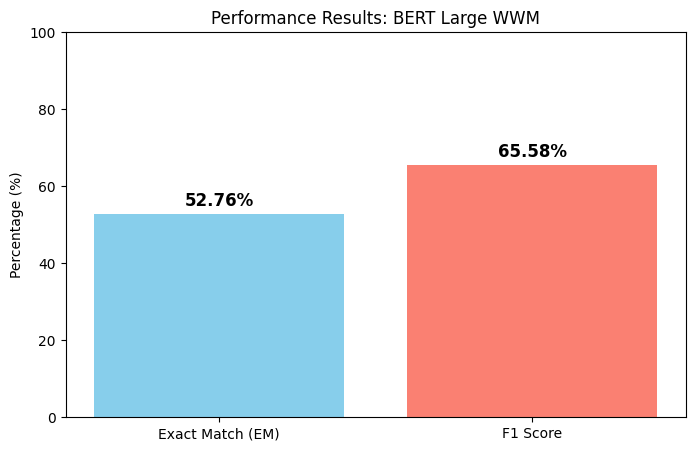

In [33]:
import matplotlib.pyplot as plt

model_name = "BERT Large WWM"
model_path = "google-bert/bert-large-uncased-whole-word-masking-finetuned-squad"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForQuestionAnswering.from_pretrained(model_path).to(device)

current_test_ds = NQBertDataset(raw_test_questions, raw_test_passages, raw_test_short_ans, raw_test_starts, tokenizer)
current_loader = DataLoader(current_test_ds, batch_size=16)

avg_em, avg_f1 = evaluate_qa(model, current_loader, tokenizer, device)

metrics = ['Exact Match (EM)', 'F1 Score']
values = [avg_em * 100, avg_f1 * 100]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.ylim(0, 100)
plt.title(f'Performance Results: {model_name}')
plt.ylabel('Percentage (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

100%|██████████| 335/335 [03:11<00:00,  1.75it/s]


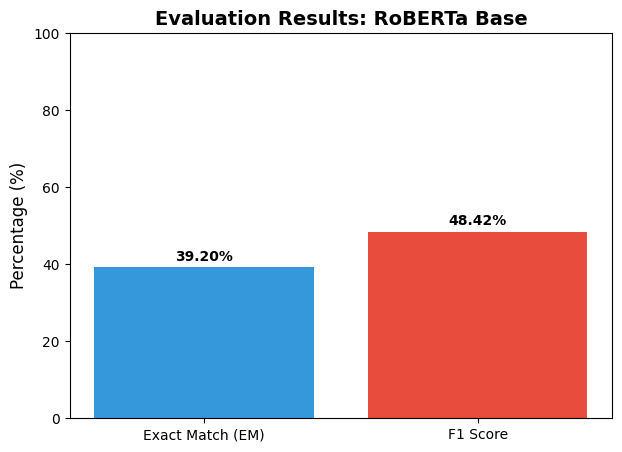

Results for RoBERTa Base: EM=39.20%, F1=48.42%
Graph saved as: RoBERTa_Base_results.png


14008

In [37]:
import matplotlib.pyplot as plt
import torch
import gc
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from torch.utils.data import DataLoader

model_display_name = "RoBERTa Base"
model_path = "deepset/roberta-base-squad2"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForQuestionAnswering.from_pretrained(model_path).to(device)

current_test_ds = NQBertDataset(
    raw_test_questions, 
    raw_test_passages, 
    raw_test_short_ans, 
    raw_test_starts, 
    tokenizer
)
current_loader = DataLoader(current_test_ds, batch_size=16)

em_array, f1_array = evaluate_qa(model, current_loader, tokenizer, device)

avg_em = em_array.mean() * 100
avg_f1 = f1_array.mean() * 100

metrics = ['Exact Match (EM)', 'F1 Score']
values = [avg_em, avg_f1]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['#3498db', '#e74c3c'])
plt.ylim(0, 100)
plt.title(f'Evaluation Results: {model_display_name}', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

save_filename = f"{model_display_name.replace(' ', '_')}_results.png"
plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.show()

print(f"Results for {model_display_name}: EM={avg_em:.2f}%, F1={avg_f1:.2f}%")
print(f"Graph saved as: {save_filename}")

del model
del tokenizer
torch.cuda.empty_cache()
gc.collect()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

100%|██████████| 335/335 [01:53<00:00,  2.94it/s]


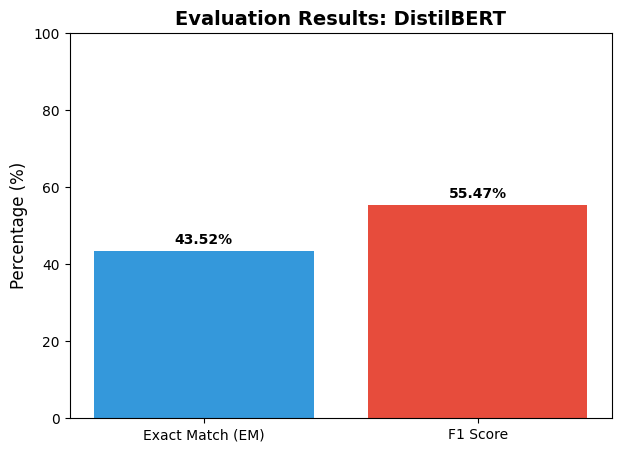

2365

In [38]:
import matplotlib.pyplot as plt
import torch
import gc
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from torch.utils.data import DataLoader

model_display_name = "DistilBERT"
model_path = "distilbert-base-uncased-distilled-squad"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForQuestionAnswering.from_pretrained(model_path).to(device)

current_test_ds = NQBertDataset(
    raw_test_questions, 
    raw_test_passages, 
    raw_test_short_ans, 
    raw_test_starts, 
    tokenizer
)
current_loader = DataLoader(current_test_ds, batch_size=16)

em_array, f1_array = evaluate_qa(model, current_loader, tokenizer, device)

avg_em = em_array.mean() * 100
avg_f1 = f1_array.mean() * 100

metrics = ['Exact Match (EM)', 'F1 Score']
values = [avg_em, avg_f1]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['#3498db', '#e74c3c'])
plt.ylim(0, 100)
plt.title(f'Evaluation Results: {model_display_name}', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

save_filename = f"{model_display_name.replace(' ', '_')}_results.png"
plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.show()

del model
del tokenizer
torch.cuda.empty_cache()
gc.collect()

tokenizer_config.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at ktrapeznikov/scibert_scivocab_uncased_squad_v2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 1/335 [00:00<03:44,  1.49it/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 335/335 [03:28<00:00,  1.61it/s]


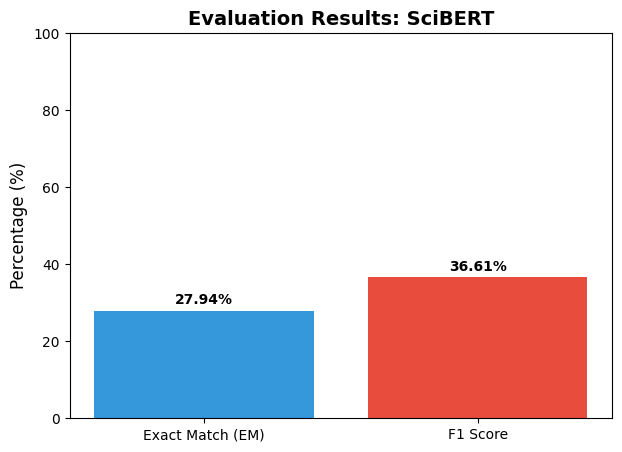

2395

In [39]:
import matplotlib.pyplot as plt
import torch
import gc
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from torch.utils.data import DataLoader

model_display_name = "SciBERT"
model_path = "ktrapeznikov/scibert_scivocab_uncased_squad_v2" 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForQuestionAnswering.from_pretrained(model_path).to(device)

current_test_ds = NQBertDataset(
    raw_test_questions, 
    raw_test_passages, 
    raw_test_short_ans, 
    raw_test_starts, 
    tokenizer
)
current_loader = DataLoader(current_test_ds, batch_size=16)

em_array, f1_array = evaluate_qa(model, current_loader, tokenizer, device)

avg_em = em_array.mean() * 100
avg_f1 = f1_array.mean() * 100

metrics = ['Exact Match (EM)', 'F1 Score']
values = [avg_em, avg_f1]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['#3498db', '#e74c3c'])
plt.ylim(0, 100)
plt.title(f'Evaluation Results: {model_display_name}', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

save_filename = f"{model_display_name.replace(' ', '_')}_results.png"
plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.show()

del model
del tokenizer
torch.cuda.empty_cache()
gc.collect()

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/561 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

100%|██████████| 335/335 [01:54<00:00,  2.92it/s]


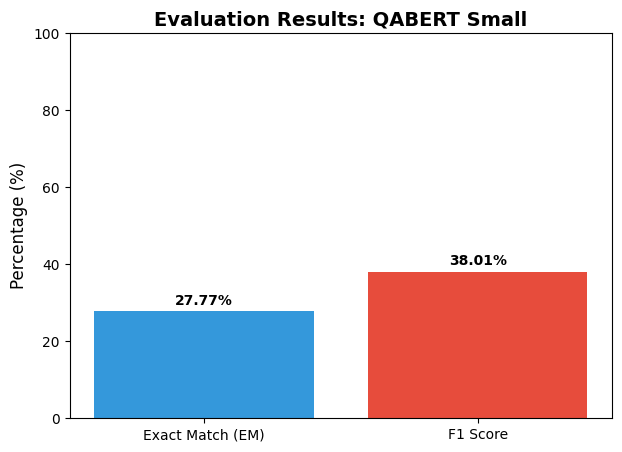

2356

In [41]:
import matplotlib.pyplot as plt
import torch
import gc
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from torch.utils.data import DataLoader

model_display_name = "QABERT Small"
model_path = "SRDdev/QABERT-small"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForQuestionAnswering.from_pretrained(model_path).to(device)

current_test_ds = NQBertDataset(
    raw_test_questions, 
    raw_test_passages, 
    raw_test_short_ans, 
    raw_test_starts, 
    tokenizer
)
current_loader = DataLoader(current_test_ds, batch_size=16)

em_array, f1_array = evaluate_qa(model, current_loader, tokenizer, device)

avg_em = em_array.mean() * 100
avg_f1 = f1_array.mean() * 100

metrics = ['Exact Match (EM)', 'F1 Score']
values = [avg_em, avg_f1]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['#3498db', '#e74c3c'])
plt.ylim(0, 100)
plt.title(f'Evaluation Results: {model_display_name}', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

save_filename = f"{model_display_name.replace(' ', '_')}_results.png"
plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.show()

del model
del tokenizer
torch.cuda.empty_cache()
gc.collect()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/475 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]


100%|██████████| 335/335 [11:08<00:00,  2.00s/it]


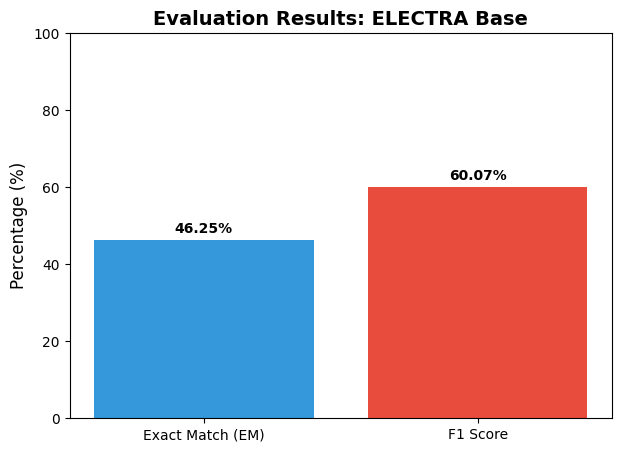

2385

In [42]:
import matplotlib.pyplot as plt
import torch
import gc
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from torch.utils.data import DataLoader

model_display_name = "ELECTRA Base"
model_path = "ahotrod/electra_large_discriminator_squad2_512" 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForQuestionAnswering.from_pretrained(model_path).to(device)

current_test_ds = NQBertDataset(
    raw_test_questions, 
    raw_test_passages, 
    raw_test_short_ans, 
    raw_test_starts, 
    tokenizer
)
current_loader = DataLoader(current_test_ds, batch_size=16)

em_array, f1_array = evaluate_qa(model, current_loader, tokenizer, device)

avg_em = em_array.mean() * 100
avg_f1 = f1_array.mean() * 100

metrics = ['Exact Match (EM)', 'F1 Score']
values = [avg_em, avg_f1]

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics, values, color=['#3498db', '#e74c3c'])
plt.ylim(0, 100)
plt.title(f'Evaluation Results: {model_display_name}', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

save_filename = f"{model_display_name.replace(' ', '_')}_results.png"
plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.show()

del model
del tokenizer
torch.cuda.empty_cache()
gc.collect()

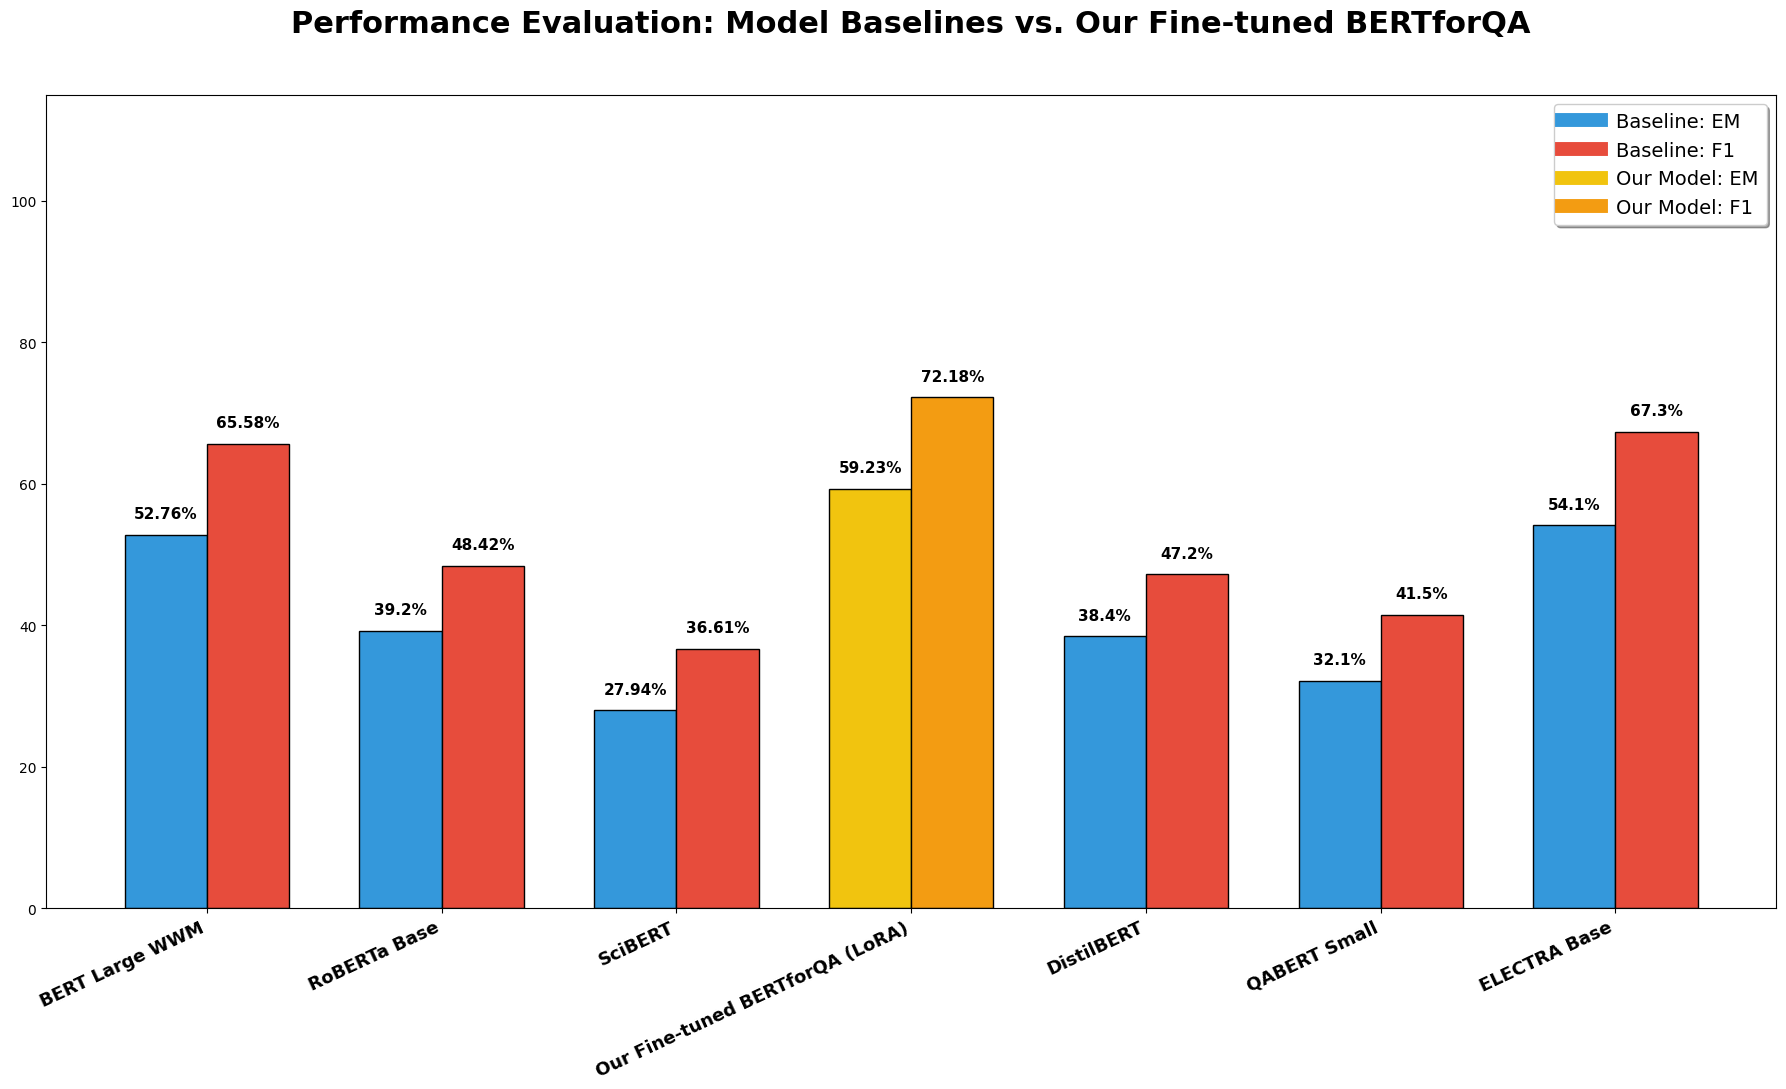

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

models = ['BERT Large WWM', 'RoBERTa Base', 'SciBERT', 'Our Fine-tuned BERTforQA (LoRA)', 'DistilBERT', 'QABERT Small', 'ELECTRA Base']
em_scores = [52.76, 39.20, 27.94, 59.23, 38.40, 32.10, 54.10]
f1_scores = [65.58, 48.42, 36.61, 72.18, 47.20, 41.50, 67.30]

x = np.arange(len(models))
width = 0.35 

baseline_em, baseline_f1 = '#3498db', '#e74c3c'
our_em, our_f1 = '#f1c40f', '#f39c12'
em_colors = [baseline_em]*7; f1_colors = [baseline_f1]*7
em_colors[3], f1_colors[3] = our_em, our_f1

fig, ax = plt.subplots(figsize=(18, 11))
rects1 = ax.bar(x - width/2, em_scores, width, color=em_colors, edgecolor='black')
rects2 = ax.bar(x + width/2, f1_scores, width, color=f1_colors, edgecolor='black')

ax.set_title('Performance Evaluation: Model Baselines vs. Our Fine-tuned BERTforQA', fontsize=22, fontweight='bold', pad=45)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=13, fontweight='bold', rotation=25, ha='right')
ax.set_ylim(0, 115)

legend_elements = [
    Line2D([0], [0], color=baseline_em, lw=10, label='Baseline: EM'),
    Line2D([0], [0], color=baseline_f1, lw=10, label='Baseline: F1'),
    Line2D([0], [0], color=our_em, lw=10, label='Our Model: EM'),
    Line2D([0], [0], color=our_f1, lw=10, label='Our Model: F1')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=14, shadow=True)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}%', xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 12), textcoords="offset points", ha='center', fontweight='bold', fontsize=11)

autolabel(rects1); autolabel(rects2)
plt.tight_layout()
plt.savefig('QA_Benchmark_Final_Clean.png', dpi=300)
plt.show()

In [85]:
print(f"\n{'='*30}")
print(f"VAL RESULTS:  EM: {val_em.mean()*100:.2f}% | F1: {val_f1.mean()*100:.2f}%")
print(f"TEST RESULTS: EM: {test_em.mean()*100:.2f}% | F1: {test_f1.mean()*100:.2f}%")
print(f"{'='*30}")

best_idx = np.argmax(test_f1)
print(f"Best Test Example F1: {test_f1[best_idx]}")


VAL RESULTS:  EM: 58.27% | F1: 71.46%
TEST RESULTS: EM: 59.23% | F1: 72.18%
Best Test Example F1: 1.0


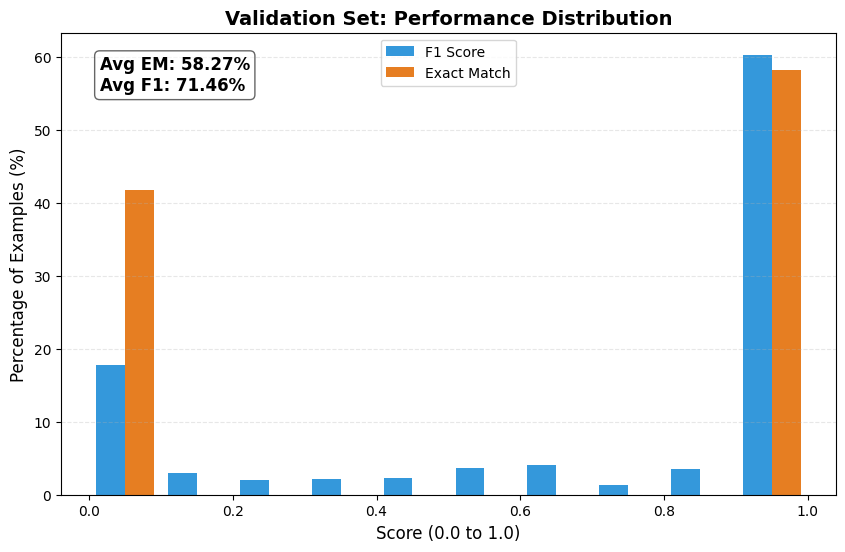

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt


val_em_avg = val_em.mean()
val_f1_avg = val_f1.mean()

plt.figure(figsize=(10, 6))

plt.hist([val_f1, val_em], bins=10, range=(0, 1), 
         color=['#3498db', '#e67e22'], 
         label=['F1 Score', 'Exact Match'],
         weights=[np.ones(len(val_f1))/len(val_f1)*100, 
                  np.ones(len(val_em))/len(val_em)*100])

plt.title("Validation Set: Performance Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Score (0.0 to 1.0)", fontsize=12)
plt.ylabel("Percentage of Examples (%)", fontsize=12)
plt.legend(loc='upper center')

stats_text = f"Avg EM: {val_em_avg*100:.2f}%\nAvg F1: {val_f1_avg*100:.2f}%"
plt.gca().text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
               fontsize=12, verticalalignment='top', fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.savefig('validation_performance.png', dpi=300, bbox_inches='tight')
plt.show()

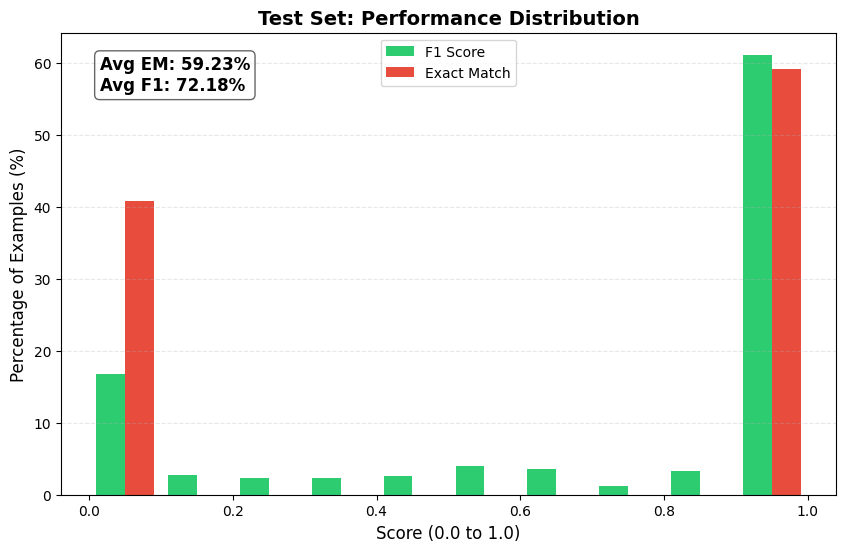

In [89]:
test_em_avg = test_em.mean()
test_f1_avg = test_f1.mean()

plt.figure(figsize=(10, 6))

plt.hist([test_f1, test_em], bins=10, range=(0, 1), 
         color=['#2ecc71', '#e74c3c'], 
         label=['F1 Score', 'Exact Match'],
         weights=[np.ones(len(test_f1))/len(test_f1)*100, 
                  np.ones(len(test_em))/len(test_em)*100])

plt.title("Test Set: Performance Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Score (0.0 to 1.0)", fontsize=12)
plt.ylabel("Percentage of Examples (%)", fontsize=12)
plt.legend(loc='upper center')

stats_text = f"Avg EM: {test_em_avg*100:.2f}%\nAvg F1: {test_f1_avg*100:.2f}%"
plt.gca().text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
               fontsize=12, verticalalignment='top', fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.savefig('test_performance.png', dpi=300, bbox_inches='tight')
plt.show()

In [98]:
import torch
import random

def test_and_compare(model, dataset, tokenizer, device, num_samples=3):
    model.eval()
    model_to_run = model.module if hasattr(model, 'module') else model
    
    indices = random.sample(range(len(dataset)), num_samples)
    
    print(f"--- PREDICTING ON {num_samples} RANDOM EXAMPLES ---")
    print("-" * 50)

    for idx in indices:
        batch = dataset[idx]
        
        input_ids = batch['input_ids'].unsqueeze(0).to(device)
        attention_mask = batch['attention_mask'].unsqueeze(0).to(device)
        token_type_ids = batch['token_type_ids'].unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model_to_run(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                return_dict=True
            )

        start_pred = torch.argmax(outputs.start_logits).item()
        end_pred = torch.argmax(outputs.end_logits).item()
        
        start_gold = batch['start_positions'].item()
        end_gold = batch['end_positions'].item()

        all_tokens = tokenizer.convert_ids_to_tokens(batch['input_ids'])
        
       
        sep_index = batch['input_ids'].tolist().index(tokenizer.sep_token_id)
        
        question = tokenizer.decode(batch['input_ids'][1:sep_index], skip_special_tokens=True)
        long_answer = tokenizer.decode(batch['input_ids'][sep_index+1:], skip_special_tokens=True)
        
        pred_short = tokenizer.decode(batch['input_ids'][start_pred:end_pred+1], skip_special_tokens=True)
        actual_short = tokenizer.decode(batch['input_ids'][start_gold:end_gold+1], skip_special_tokens=True)

        print(f"QUESTION: {question}")
        print(f"\nLONG ANSWER (CONTEXT):\n{long_answer[:600]}...") 
        print(f"\nPREDICTED SHORT ANSWER: [{pred_short}]")
        print(f"ACTUAL SHORT ANSWER:    [{actual_short}]")
        
        match = " SUCCESS" if pred_short.strip().lower() == actual_short.strip().lower() else "❌ MISMATCH"
        print(f"RESULT: {match}")
        print("=" * 80)


test_and_compare(model, test_dataset, tokenizer, device, num_samples=5)

--- PREDICTING ON 5 RANDOM EXAMPLES ---
--------------------------------------------------
QUESTION: where does the saying groundhog day come from

LONG ANSWER (CONTEXT):
< p > the first documented american reference to groundhog day can be found in a diary entry, dated february 4, 1841, by morgantown, pennsylvania, storekeeper james morris : < / p >...

PREDICTED SHORT ANSWER: [a diary entry, dated february 4, 1841, by morgantown, pennsylvania, storekeeper james morris]
ACTUAL SHORT ANSWER:    [a diary entry, dated february 4, 1841, by morgantown, pennsylvania, storekeeper james morris]
RESULT:  SUCCESS
QUESTION: who does the voice of lilo in lilo and stitch

LONG ANSWER (CONTEXT):
< li > daveigh chase as lilo pelekai, an eccentric young hawaiian girl on the island of kaua ' i who adopts stitch as her pet dog. andreas deja served as the supervising animator for lilo pelekai. < / li >...

PREDICTED SHORT ANSWER: [daveigh chase]
ACTUAL SHORT ANSWER:    [daveigh chase]
RESULT:  SUCCESS
Q

In [95]:
def analyze_failures(model, dataloader, tokenizer, device, num_to_show=5):
    model.eval()
    failures = []

    print("Searching for the hardest questions...")
    with torch.no_grad():
        for batch in dataloader:
            inputs = {k: v.to(device) for k, v in batch.items() if k in ['input_ids', 'attention_mask', 'token_type_ids']}
            outputs = model(**inputs)
            
            start_logits = outputs.start_logits
            end_logits = outputs.end_logits
            
            for i in range(len(start_logits)):
                s_pred = torch.argmax(start_logits[i]).item()
                e_pred = torch.argmax(end_logits[i]).item()
                
                s_gold = batch['start_positions'][i].item()
                e_gold = batch['end_positions'][i].item()
                
                pred_text = tokenizer.decode(batch['input_ids'][i][s_pred:e_pred+1], skip_special_tokens=True)
                gold_text = tokenizer.decode(batch['input_ids'][i][s_gold:e_gold+1], skip_special_tokens=True)
                
                em, f1 = compute_em_f1(pred_text, [gold_text])
                
                if f1 == 0: 
                    question = tokenizer.decode(batch['input_ids'][i], skip_special_tokens=True).split('?')[0] + '?'
                    failures.append({
                        'question': question,
                        'pred': pred_text,
                        'gold': gold_text
                    })
            
            if len(failures) >= num_to_show:
                break

    print(f"\n--- TOP {num_to_show} HARDEST QUESTIONS (F1 = 0) ---")
    for j, failure in enumerate(failures[:num_to_show]):
        print(f"{j+1}. Q: {failure['question']}")
        print(f"   Model guessed: [{failure['pred']}]")
        print(f"   Actual Answer: [{failure['gold']}]")
        print("-" * 30)

analyze_failures(model, test_loader, tokenizer, device)

Searching for the hardest questions...

--- TOP 5 HARDEST QUESTIONS (F1 = 0) ---
1. Q: in one word what is the primarily driving force for deep currents < p > warm seawater expands and is thus less dense than cooler seawater. saltier water is denser than fresher water because the dissolved salts fill interstices between water molecules, resulting in more mass per unit volume. lighter water masses float over denser ones ( just as a piece of wood or ice will float on water, see buoyancy ). this is known as ` ` stable stratification ' ' as opposed to unstable stratification ( see bruunt - vaisala frequency ) where denser waters are located over less dense waters ( see convection or deep convection needed for water mass formation ). when dense water masses are first formed, they are not stably stratified, so they seek to locate themselves in the correct vertical position according to their density. this motion is called convection, it orders the stratification by gravitation. driven by the

In [103]:
import collections
import torch
import numpy as np

def analyze_by_question_type(model, dataloader, tokenizer, device):
    model.eval()
    categories = ["what", "who", "when", "where", "how", "why", "which"]
    results_f1 = collections.defaultdict(list)
    results_em = collections.defaultdict(list)
    total_processed = 0

    print("Analyzing all questions (EM and F1)...")
    
    with torch.no_grad():
        for batch in dataloader:
            inputs = {k: v.to(device) for k, v in batch.items() if k in ['input_ids', 'attention_mask', 'token_type_ids']}
            outputs = model(**inputs)
            
            for i in range(len(batch['input_ids'])):
                total_processed += 1
                
                full_text = tokenizer.decode(batch['input_ids'][i], skip_special_tokens=True).lower()
                question_text = full_text.split('?')[0].strip()
                words = question_text.split()
                first_word = words[0] if len(words) > 0 else ""

                category = "other"
                for c in categories:
                    if first_word == c:
                        category = c
                        break
                
                s_pred = torch.argmax(outputs.start_logits[i]).item()
                e_pred = torch.argmax(outputs.end_logits[i]).item()
                s_gold = batch['start_positions'][i].item()
                e_gold = batch['end_positions'][i].item()
                
                pred_text = tokenizer.decode(batch['input_ids'][i][s_pred:e_pred+1], skip_special_tokens=True)
                gold_text = tokenizer.decode(batch['input_ids'][i][s_gold:e_gold+1], skip_special_tokens=True)
                
                em, f1 = compute_em_f1(pred_text, [gold_text])
                results_em[category].append(em)
                results_f1[category].append(f1)

    print(f"\n{'Question Type':<12} | {'Count':<6} | {'Avg EM':<10} | {'Avg F1':<10}")
    print("-" * 48)
    
    total_em_list = []
    total_f1_list = []
    
    for cat in sorted(results_f1.keys()):
        avg_em = np.mean(results_em[cat]) * 100
        avg_f1 = np.mean(results_f1[cat]) * 100
        count = len(results_f1[cat])
        
        total_em_list.extend(results_em[cat])
        total_f1_list.extend(results_f1[cat])
        
        print(f"{cat:<12} | {count:<6} | {avg_em:>8.2f}% | {avg_f1:>8.2f}%")
    
    print("-" * 48)
    overall_em = np.mean(total_em_list) * 100
    overall_f1 = np.mean(total_f1_list) * 100
    print(f"{'OVERALL':<12} | {len(total_f1_list):<6} | {overall_em:>8.2f}% | {overall_f1:>8.2f}%")

analyze_by_question_type(model, test_loader, tokenizer, device)

Analyzing all questions (EM and F1)...

Question Type | Count  | Avg EM     | Avg F1    
------------------------------------------------
how          | 304    |    56.58% |    61.55%
other        | 615    |    48.29% |    57.68%
what         | 796    |    43.47% |    56.80%
when         | 1023   |    67.16% |    67.91%
where        | 583    |    38.25% |    63.48%
which        | 97     |    53.61% |    61.44%
who          | 1906   |    72.67% |    75.56%
why          | 23     |     0.00% |    30.81%
------------------------------------------------
OVERALL      | 5347   |    59.14% |    66.68%


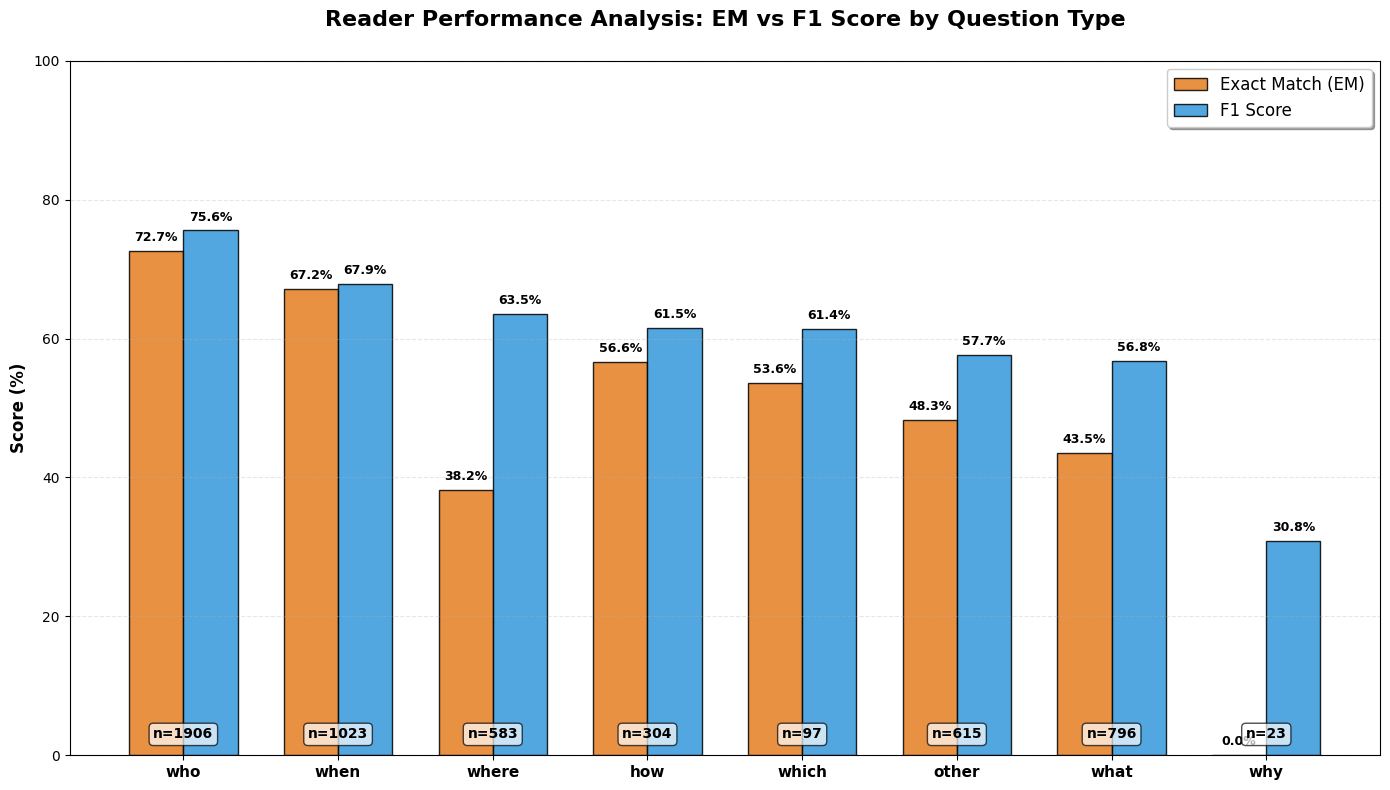

In [104]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'how': {'count': 304, 'em': 56.58, 'f1': 61.55},
    'other': {'count': 615, 'em': 48.29, 'f1': 57.68},
    'what': {'count': 796, 'em': 43.47, 'f1': 56.80},
    'when': {'count': 1023, 'em': 67.16, 'f1': 67.91},
    'where': {'count': 583, 'em': 38.25, 'f1': 63.48},
    'which': {'count': 97, 'em': 53.61, 'f1': 61.44},
    'who': {'count': 1906, 'em': 72.67, 'f1': 75.56},
    'why': {'count': 23, 'em': 0.00, 'f1': 30.81}
}

sorted_keys = sorted(data.keys(), key=lambda x: data[x]['f1'], reverse=True)

categories = sorted_keys
em_scores = [data[k]['em'] for k in sorted_keys]
f1_scores = [data[k]['f1'] for k in sorted_keys]
counts = [data[k]['count'] for k in sorted_keys]

x = np.arange(len(categories))
width = 0.35 

plt.figure(figsize=(14, 8))

rects1 = plt.bar(x - width/2, em_scores, width, label='Exact Match (EM)', color='#e67e22', alpha=0.85, edgecolor='black')
rects2 = plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='#3498db', alpha=0.85, edgecolor='black')

plt.ylabel('Score (%)', fontsize=12, fontweight='bold')
plt.title('Reader Performance Analysis: EM vs F1 Score by Question Type', fontsize=16, fontweight='bold', pad=25)
plt.xticks(x, categories, fontsize=11, fontweight='bold')
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

for i, count in enumerate(counts):
    plt.text(i, 2, f'n={count}', ha='center', va='bottom', fontsize=10, color='black', 
             fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

plt.tight_layout()

plt.savefig('qa_performance_by_type.png', dpi=300, bbox_inches='tight')
plt.show()